In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [3]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [4]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [5]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df_plot['basis size'], df_plot[feature], marker='o')

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

In [6]:
li_2se = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [7]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [8]:

be_1se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [9]:


be_3po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [10]:
be_1po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [11]:
li_2po = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [12]:
be_3se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [13]:
b_4pe = upload_df1('/home/aldiyar/extrapolation/small-dataset/B_4Pe-01.csv')
b_4pe_inf = b_4pe.loc[b_4pe['basis size'] == max(b_4pe['basis size'])]
b_4pe_init = b_4pe.iloc[:10]

In [57]:
c_3pe = upload_df1('/home/aldiyar/extrapolation/small-dataset/C_3Pe-01.csv')
c_3pe_inf = c_3pe.loc[c_3pe['basis size'] == max(c_3pe['basis size'])]
c_3pe_init = c_3pe.iloc[3:7]

In [60]:
c_3pe_inf

,basis size,Energy,delta(r_1),drach_delta(r_1),delta(r_12),drach_delta(r_12),MV,drach_MV,r_1,r_12,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r^2_1,r^2_12,SO1,SO2
11,10000,-37.843184452596410949,21.220555290426151629,21.226622868192048799,0.44279835285248581,0.44260829826793352,-1484.831492027100921405,-1485.555684072104895677,1.187872333429303984,1.939089701985122982,23.11642172265840145,1.942730817320611925,2.44999497768877017,0.834230106356358858,2.294857919373393784,4.915001233138757364,2.469274470587150994,-1.275872183817337691


Available columns to analyze:
- Energy
- delta(r_1)
- drach_delta(r_1)
- delta(r_12)
- drach_delta(r_12)
- MV
- drach_MV
- r_1
- r_12
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r^2_1
- r^2_12
- SO1
- SO2
------------------------------

--- Fitting Exponential Model ---
  Initial guesses: C=-37.843167, A=0.000027, B=0.100000
  Model type: exp
Optimizing Exponential weights using known value: -37.84318445
  Best weight power: 1 with distance 1.11e-06
Fitted parameters:
  C = -37.8431855630 ± 0.0000006334 (asymptote)
  A = 0.0000457188 ± 0.0000005517 (amplitude)
  B = 1.4597853152 ± 0.0464308049 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 1.885792e-14, RMSE = 6.866206e-08

--- Fitting Exponential SQ Model ---
  Initial guesses: C=-37.843167, A=0.000027, B=0.100000
  Model type: exp_sq
Optimizing Exponential SQ weights using known value: -37.84318445
  Best weight power: 1 with distance 3.60e-05
Fitted parameters:
  C = -37.8432204491 ± 0.0001399371 (asy

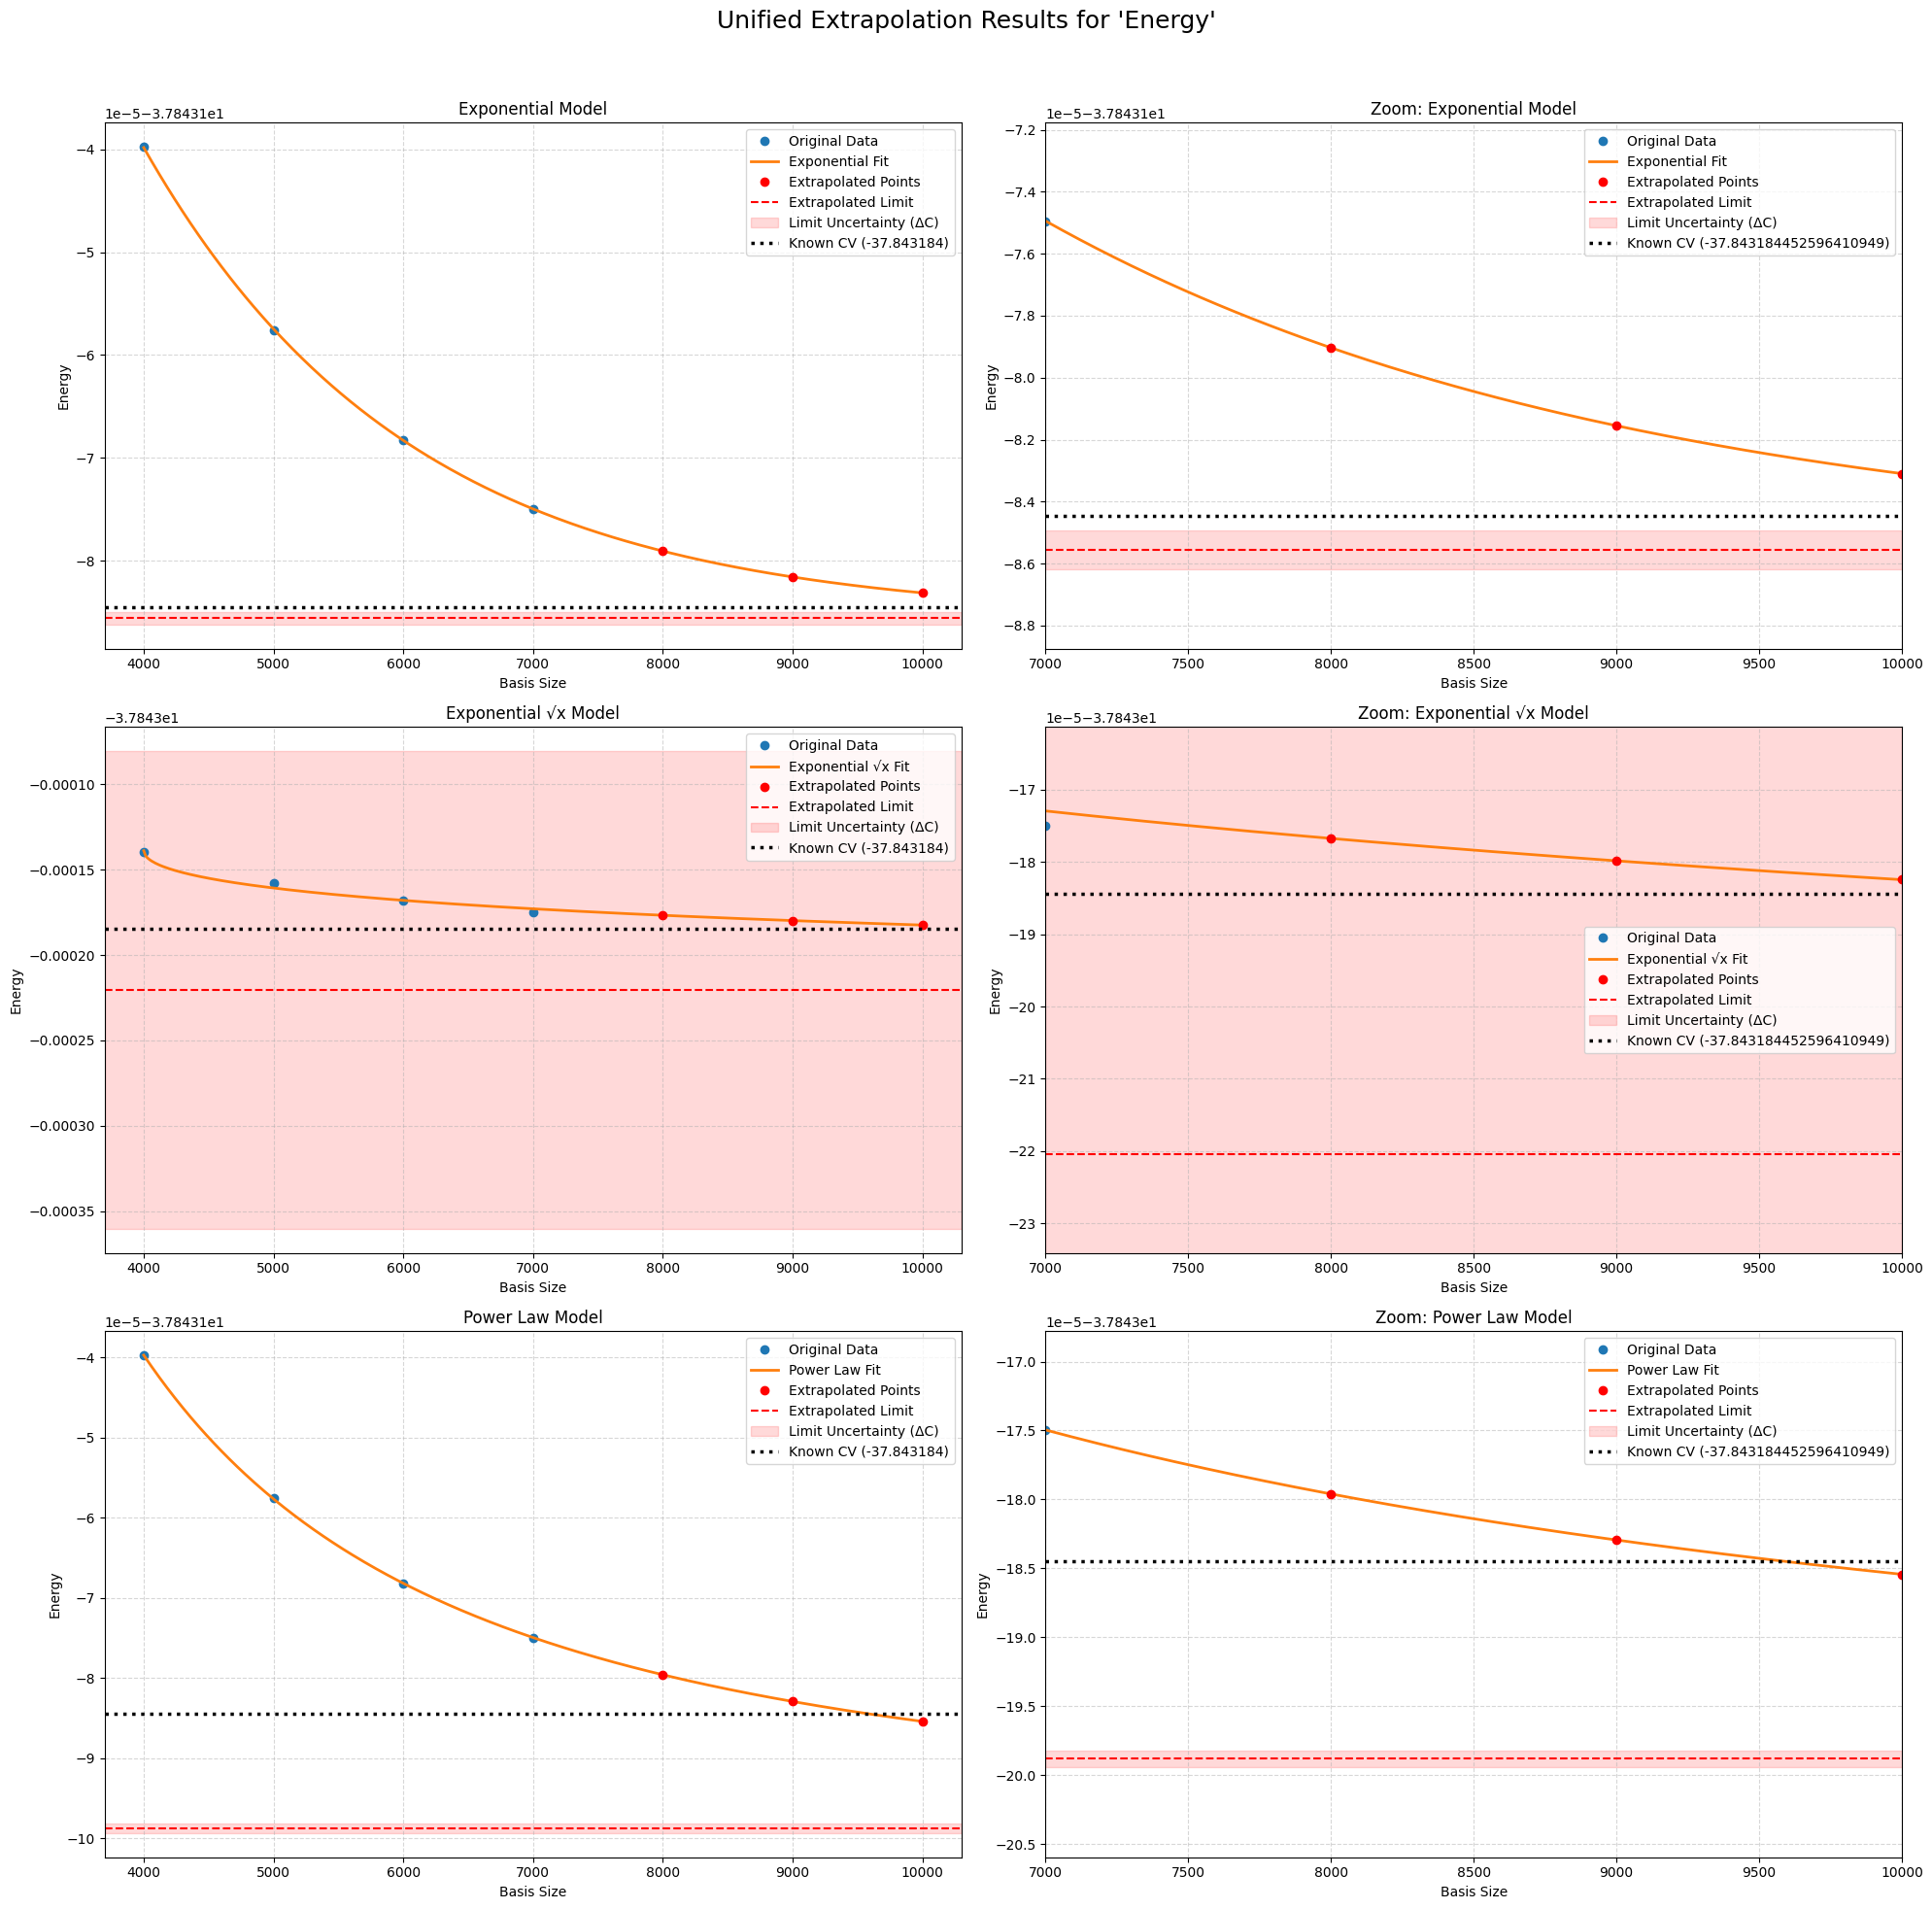

In [84]:
import extrapolator

extrapolator.unified_extrapolator(c_3pe_init).fit()

In [99]:
reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)

/tmp/ipykernel_1324/4049882052.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)


In [ ]:
import re
import extrapolator  # your unified_extrapolator module

class SystemExtrapolator:
    """
    Given one system's dataframe with 'basis size' and multiple expectation value columns,
    extrapolate each column to infinity using unified_extrapolator and return new *_inf columns
    WITH uncertainties.
    """

    def __init__(self, df, target_basis_size):
        if "basis size" not in df.columns:
            raise ValueError("DataFrame must contain 'basis size'.")
        self.df = df.copy()
        self.target_basis_size = target_basis_size

    def extrapolate_all(self):
        result_df = self.df.copy()
        expectation_columns = [c for c in self.df.columns if c != "basis size"]

        for col in expectation_columns:
            extrap = extrapolator.unified_extrapolator(self.df)
            extrap.fit_column(col, self.target_basis_size)

            # Extract VALUES
            exp_inf = extrap.results['exponential'].params['C'].value
            exp_sq_inf = extrap.results['exponential_sq'].params['C'].value
            power_inf = extrap.results['power'].params['C'].value

            # Extract UNCERTAINTIES (ΔC for each model)
            exp_unc = extrap.uncertainties['exponential']
            exp_sq_unc = extrap.uncertainties['exponential_sq']
            power_unc = extrap.uncertainties['power']

            # Store in dataframe
            result_df[f"{col}_exp_inf"] = exp_inf
            result_df[f"{col}_exp_sq_inf"] = exp_sq_inf
            result_df[f"{col}_power_inf"] = power_inf

            result_df[f"{col}_exp_unc"] = exp_unc
            result_df[f"{col}_exp_sq_unc"] = exp_sq_unc
            result_df[f"{col}_power_unc"] = power_unc

        return result_df


def extrapolate_system(df, system_name, target_basis_size):
    """
    Extrapolate all expectation values for a system and return results WITH uncertainties.
    """
    extr = SystemExtrapolator(df, target_basis_size)
    res = extr.extrapolate_all()

    rows = []
    for col in df.columns:
        if col == "basis size":
            continue
        rows.append({
            "system": system_name,
            "expectation_value": col,
            # VALUES
            "exp_inf": res[f"{col}_exp_inf"].iloc[0],
            "exp_sq_inf": res[f"{col}_exp_sq_inf"].iloc[0],
            "power_inf": res[f"{col}_power_inf"].iloc[0],
            # UNCERTAINTIES
            "exp_unc": res[f"{col}_exp_unc"].iloc[0],
            "exp_sq_unc": res[f"{col}_exp_sq_unc"].iloc[0],
            "power_unc": res[f"{col}_power_unc"].iloc[0],
        })
    return pd.DataFrame(rows)


def get_target_basis_size(reference_values, system_name):
    """
    Parse basis size from the 'source' column (e.g., our_calc_16400).
    If not found for this expectation, fall back to another row of the same system.
    """
    sys_refs = reference_values[reference_values["system"] == system_name]

    # Try to extract basis size from any matching source
    for src in sys_refs["source"].dropna().unique():
        match = re.search(r"our_calc_(\d+)", src)
        if match:
            return int(match.group(1))

    raise ValueError(f"Could not determine target basis size for {system_name}")


# --- Example usage ---

systems = {
    "infBe_1Po-01": be_1po_init,
    "infBe_1Se-01": be_1se_init,
    "infBe_3Po-01": be_3po_init,
    "infBe_3Se-01": be_3se_init,
    "infLi_2Po-01": li_2po_init,
    "infLi_2Se-01": li_2se_init,
}

all_results = []
for sys_name, df in systems.items():
    target_basis_size = get_target_basis_size(reference_values, sys_name)
    all_results.append(extrapolate_system(df, sys_name, target_basis_size))

extrapolated_df = pd.concat(all_results, ignore_index=True)

# --- Merge with reference_values ---
reference_values = reference_values.merge(
    extrapolated_df,
    on=["system", "expectation_value"],
    how="left"
)

# Replace NaN with 0 if desired
reference_values = reference_values.fillna(0)





--- Fitting Exponential Model ---
  Initial guesses: C=-14.473451, A=0.000028, B=6.962569
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = -14.4734512629 ± 0.0000000061 (asymptote)
  A = 0.0000193528 ± 0.0000010051 (amplitude)
  B = 6.2020963839 ± 0.1304066804 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 6.837667e-14, RMSE = 3.661583e-08

--- Fitting Exponential SQ Model ---
  Initial guesses: C=-14.473451, A=0.000028, B=7.848533
  Model type: exp_sq
  No known convergent value provided, using weight power n=1 for Exponential SQ
Fitted parameters:
  C = -14.4734514373 ± 0.0000000189 (asymptote)
  A = 0.0000612295 ± 0.0000034881 (amplitude)
  B = 5.7975067122 ± 0.1172294418 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 2.339869e-13, RMSE = 6.773462e-08

--- Fitting Power Law Model ---
  No known convergent value provided, using weight power n

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

Fitted parameters:
  C = -1.1812668025 ± 0.0015157171 (asymptote)
  A = -0.0585104548 ± 0.0019490985 (amplitude)
  B = 1.9890614010 ± 0.1843475552 (decay rate)
Parameter signs: C=negative, A=negative, B=positive
Fit quality: χ² = 5.613017e-05, RMSE = 1.059530e-03

--- Fitting Power Law Model ---
Removed 1 early inconsistent point(s) for 'prval(r_12)'
  No known convergent value provided, using weight power n=1 for Power Law
Fitted parameters:
  C = -1.1896124698 ± 0.5707265082 (asymptote)
  A = -0.0431090039 ± 0.5707711675 (amplitude)
  B = 0.0000010000 ± 0.0000000000 (decay rate)
Parameter signs: C=negative, A=negative, B=positive
Fit quality: χ² = 6.170028e-02, RMSE = 3.512841e-02

FINAL RESULTS FOR 'prval(r_12)'

Exponential Model:
  Extrapolated Limit (C): -1.187774951734114071
  Total Uncertainty:      ± 0.000391893602969249

Exponential √x Model:
  Extrapolated Limit (C): -1.181266802530748006
  Total Uncertainty:      ± 0.001515717122693565

Power Law Model:
  Extrapolated Limit

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

Fitted parameters:
  C = -1.2213733215 ± 0.0008731416 (asymptote)
  A = -0.0028687921 ± 0.0007563046 (amplitude)
  B = 1.2646248380 ± 0.1645907249 (decay rate)
Parameter signs: C=negative, A=negative, B=positive
Fit quality: χ² = 3.667323e-05, RMSE = 8.479876e-04

FINAL RESULTS FOR 'prval(r_12)'

Exponential Model:
  Extrapolated Limit (C): -1.224039125488780799
  Total Uncertainty:      ± 0.000144186240441855

Exponential √x Model:
  Extrapolated Limit (C): -1.221424050778414205
  Total Uncertainty:      ± 0.000822990796118105

Power Law Model:
  Extrapolated Limit (C): -1.221373321520258015
  Total Uncertainty:      ± 0.000873141562586029

--- Fitting Exponential Model ---
  Initial guesses: C=-14.567244, A=0.000013, B=7.039870
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = -14.5672441716 ± 0.0000000026 (asymptote)
  A = 0.0000094322 ± 0.0000004773 (amplitude)
  B = 6.2896720866 ± 0.1263209162 (decay rate)
Param

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u


--- Fitting Exponential Model ---
Removed 1 early inconsistent point(s) for 'prval(r_12)'
  Initial guesses: C=-1.166011, A=-0.027799, B=0.000001
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = -1.1654426881 ± 0.0001282674 (asymptote)
  A = -0.0323992037 ± 0.0026565468 (amplitude)
  B = 4.2720505719 ± 0.2530962093 (decay rate)
Parameter signs: C=negative, A=negative, B=positive
Fit quality: χ² = 1.045821e-05, RMSE = 4.573447e-04

--- Fitting Exponential SQ Model ---
Removed 1 early inconsistent point(s) for 'prval(r_12)'
  Initial guesses: C=-1.166011, A=-0.027799, B=0.000001
  Model type: exp_sq
  No known convergent value provided, using weight power n=1 for Exponential SQ
Fitted parameters:
  C = -1.1615607466 ± 0.0010917054 (asymptote)
  A = -0.0514431033 ± 0.0041588731 (amplitude)
  B = 2.5891429339 ± 0.3005060904 (decay rate)
Parameter signs: C=negative, A=negative, B=positive
Fit quality: χ² = 7.065822e-05,

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

Fitted parameters:
  C = -7.4101565359 ± 0.0000000004 (asymptote)
  A = 0.0000000010 ± 0.0000000001 (amplitude)
  B = 2.8764032232 ± 0.0851828288 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 3.316410e-16, RMSE = 2.550052e-09

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -7.410156532484956315
  Total Uncertainty:      ± 0.000000000006759831

Exponential √x Model:
  Extrapolated Limit (C): -7.410156532475310698
  Total Uncertainty:      ± 0.000000001381466362

Power Law Model:
  Extrapolated Limit (C): -7.410156535893350771
  Total Uncertainty:      ± 0.000000000409445540

--- Fitting Exponential Model ---
  Initial guesses: C=-77.504433, A=0.031086, B=6.568787
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = -77.5046742326 ± 0.0000499681 (asymptote)
  A = 0.0240648452 ± 0.0022200833 (amplitude)
  B = 4.9590351375 ± 0.2589501056 (decay rate)
Parameter s

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

Fitted parameters:
  C = -0.4355978399 ± 0.0000000037 (asymptote)
  A = 0.0000000010 ± 0.0000000024 (amplitude)
  B = 2.0020706633 ± 1.5756613518 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 7.553904e-15, RMSE = 1.217028e-08

FINAL RESULTS FOR 'OO'

Exponential Model:
  Extrapolated Limit (C): -0.435597836285429973
  Total Uncertainty:      ± 0.000000001017259289

Exponential √x Model:
  Extrapolated Limit (C): -0.435597833015990588
  Total Uncertainty:      ± 0.000000000185935597

Power Law Model:
  Extrapolated Limit (C): -0.435597839871959547
  Total Uncertainty:      ± 0.000000003729086335

--- Fitting Exponential Model ---
  Initial guesses: C=10.080324, A=-0.000001, B=0.100000
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = 10.0803242460 ± 0.0000000001 (asymptote)
  A = -0.0000007057 ± 0.0000000542 (amplitude)
  B = 7.6115416086 ± 0.1784342305 (decay rate)
Parameter signs

/tmp/ipykernel_1324/2153597005.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_power_inf"] = power_inf
/tmp/ipykernel_1324/2153597005.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f"{col}_exp_unc"] = exp_unc
/tmp/ipykernel_1324/2153597005.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

In [87]:
reference_values['exp_delta'] = np.abs(reference_values['exp_inf'] - reference_values['ref_value'])
reference_values['exp_sq_delta'] = np.abs(reference_values['exp_sq_inf'] - reference_values['ref_value'])
reference_values['power_delta'] = np.abs(reference_values['power_inf'] - reference_values['ref_value'])

In [88]:
reference_values.drop(columns=['exp_inf', 'exp_sq_inf', 'power_inf'], inplace=True)

In [89]:
reference_values

,system,expectation_value,ref_value,uncertainty,source,exp_delta,exp_sq_delta,power_delta
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,0.000000123993096679,0.000000050396771201,0.000000083618159508
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,0.018800163042044460,0.041391735014769893,0.025620039764476132
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,0.000202026180602388,0.003505731145310165,0.002895344881608253
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,0.000000114269627094,0.000000062382549237,0.000000235376455326
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,0.000000948627352670,0.000000345432358273,0.000001291171848550
...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.000000000121902988,0.000000000092448188,0.000000002461063769
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,0.005190206174802370,0.003591276855047454,0.002230901447404676
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.000287397673360154,0.000246475465446788,0.000144336772334816
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,0.000000000000000000,0.000000000000000000,0.000000000000000000


In [90]:

def add_function_ranks(df):
    df = df.copy()

    # Iterate over rows
    for idx, row in df.iterrows():
        # Extract errors
        errors = {
            "exp": abs(row["exp_delta"]),
            "exp_sq": abs(row["exp_sq_delta"]),
            "power": abs(row["power_delta"]),
        }

        # Find best (minimum absolute error)
        best_method = min(errors, key=errors.get)
        best_error = errors[best_method]

        # Compute r_best / r_i
        ranks = {}
        for method, err in errors.items():
            if err == 0:  # Avoid division by zero
                ranks[method] = np.inf if best_error > 0 else 1.0
            else:
                ranks[method] = best_error / err

        # Assign to new columns
        df.at[idx, "rank_exp"] = ranks["exp"]
        df.at[idx, "rank_exp_sq"] = ranks["exp_sq"]
        df.at[idx, "rank_power"] = ranks["power"]

    return df



In [91]:
df_ranked = add_function_ranks(reference_values)
df_ranked.drop(columns=['exp_delta', 'exp_sq_delta', 'power_delta'], inplace = True)

In [92]:
df_ranked

,system,expectation_value,ref_value,uncertainty,source,rank_exp,rank_exp_sq,rank_power
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,0.406448201960324662,1.000000000000000000,0.602701273233169577
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,1.000000000000000000,0.454200893858060339,0.733806942333950607
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,1.000000000000000000,0.057627402738128171,0.069776205897160826
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,0.545924151709406114,1.000000000000000000,0.265033089868247584
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,0.364139150426765368,1.000000000000000000,0.267533991436529672
...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.758375079519255202,1.000000000000000000,0.037564320413656302
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,0.429829061172049387,0.621200073803610420,1.000000000000000000
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.502219696656832415,0.585603001390728628,1.000000000000000000
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,1.000000000000000000,1.000000000000000000,1.000000000000000000


In [93]:
print(df_ranked['rank_exp'].values.sum())
print(df_ranked['rank_exp_sq'].values.sum())
print(df_ranked['rank_power'].values.sum())

80.96533900665221
95.09056986042333
69.14353343548996


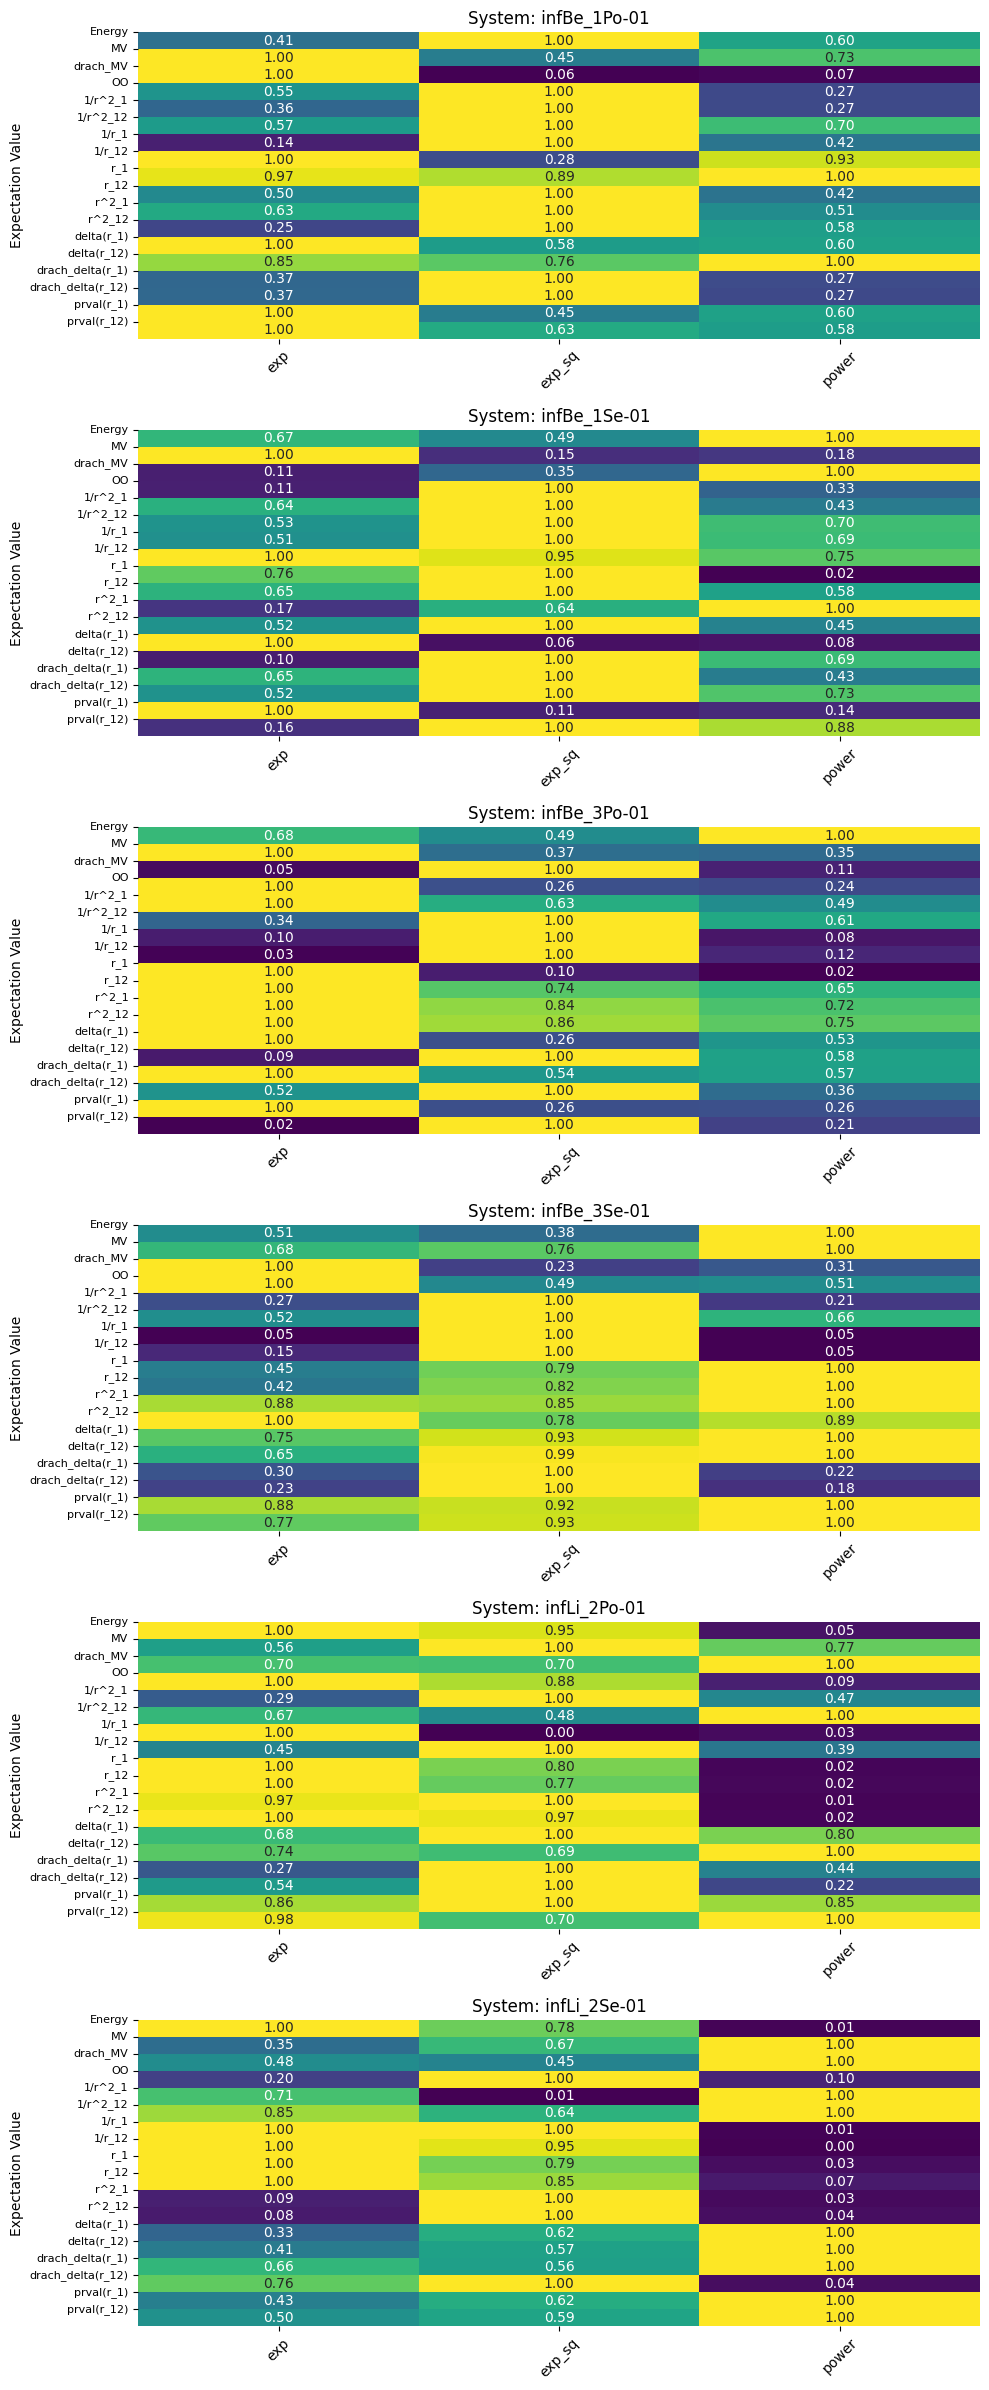

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format
df_long = df_ranked.melt(
    id_vars=["system","expectation_value"],
    value_vars=["rank_exp","rank_exp_sq","rank_power"],
    var_name="method", value_name="rank"
)

# Clean method names
df_long["method"] = df_long["method"].str.replace("rank_", "")

# Full list of expectation values
all_expectations = [
    'Energy', 'MV', 'drach_MV', 'OO', '1/r^2_1', '1/r^2_12', '1/r_1',
    '1/r_12', 'r_1', 'r_12', 'r^2_1', 'r^2_12', 'delta(r_1)', 'delta(r_12)',
    'drach_delta(r_1)', 'drach_delta(r_12)', 'prval(r_1)', 'prval(r_12)'
]

# Plot one heatmap per system
systems = df_ranked["system"].unique()
n_systems = len(systems)

fig, axes = plt.subplots(
    n_systems, 1, figsize=(10, max(4*n_systems, 0.4*len(all_expectations)))
)

# Make axes iterable even if n_systems=1
if n_systems == 1:
    axes = [axes]

for ax, system in zip(axes, systems):
    pivot = df_long[df_long["system"]==system].pivot(
        index="expectation_value", columns="method", values="rank"
    )
    pivot = pivot.reindex(all_expectations)  # ensure all rows

    sns.heatmap(
        pivot, cmap="viridis", annot=True, fmt=".2f", cbar=False, ax=ax
    )
    ax.set_title(f"System: {system}")
    ax.set_ylabel("Expectation Value")
    ax.set_xlabel("")

    # Force all labels to show
    ax.set_yticks(range(len(all_expectations)))
    ax.set_yticklabels(all_expectations, fontsize=8)

    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
